## Setup

In [1]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt

IMAGE_SIZE = 150
CAT_FILENAME_PATTERN = 'cat.{}.jpg'
DOG_FILENAME_PATTERN = 'dog.{}.jpg'

base_dir = os.path.expanduser('~/data/kaggle/dogs-vs-cats')
orig_data_dir = os.path.join(base_dir, 'train')

small_dir = os.path.join(base_dir, 'small')
os.makedirs(small_dir, exist_ok=True)

models_dir = os.path.join(small_dir, 'models')
os.makedirs(models_dir, exist_ok=True)

train_dir = os.path.join(small_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
valid_dir = os.path.join(small_dir, 'validation')
os.makedirs(valid_dir, exist_ok=True)
test_dir = os.path.join(small_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)
valid_dogs_dir = os.path.join(valid_dir, 'dogs')
os.makedirs(valid_dogs_dir, exist_ok=True)
valid_cats_dir = os.path.join(valid_dir, 'cats')
os.makedirs(valid_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)


def plot_history(history):
    hist_dict = history.history
    loss_values = hist_dict['loss']
    val_loss_values = hist_dict['val_loss']
    acc_values = hist_dict['acc']
    val_acc_values = hist_dict['val_acc']

    epochs = range(1, len(loss_values) + 1)

    fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,
                                   sharex='all', figsize=(10, 7))
    ax0.plot(epochs, loss_values, 'bo')
    ax0.plot(epochs, val_loss_values, 'b+')
    ax0.set_ylabel('Loss')

    ax1.plot(epochs, acc_values, 'bo')
    ax1.plot(epochs, val_acc_values, 'b+')
    ax1.set_ylabel('Accuracy')

    plt.show()


from keras import layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import models
from keras import activations
from keras.activations import relu, sigmoid
from keras import losses
from keras import regularizers
from keras import optimizers

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

print(conv_base.summary())


# the last layer of conv_base is
# block5_pool (MaxPooling2D)   (None, 4, 4, 512)


def extract_features(directory, sample_count, batch_size=20):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,))
    generator = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
        directory,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=batch_size,
        class_mode='binary'
    )
    i = 0
    for input_batch, labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[batch_size * i: batch_size * (i + 1)] = features_batch
        labels[batch_size * i: batch_size * (i + 1)] = labels_batch
        i += 1
        print('batch', i, 'out of', np.ceil(float(sample_count) / batch_size))
        if i * batch_size >= sample_count:
            break
    return features, labels


def extract_features2(directory, sample_count, batch_size=20):
    features = []
    labels = []
    generator = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
        directory,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=batch_size,
        class_mode='binary'
    )
    i = 0
    for input_batch, labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features += features_batch
        labels += labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return np.concatenate(features, axis=0), \
           np.concatenate(labels, axis=0)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

## Extract features

In [2]:
train_features, train_labels = extract_features(train_dir, 2000)

Found 2000 images belonging to 2 classes.
batch 1 out of 100.0
batch 2 out of 100.0
batch 3 out of 100.0
batch 4 out of 100.0
batch 5 out of 100.0
batch 6 out of 100.0
batch 7 out of 100.0
batch 8 out of 100.0
batch 9 out of 100.0
batch 10 out of 100.0
batch 11 out of 100.0
batch 12 out of 100.0
batch 13 out of 100.0
batch 14 out of 100.0
batch 15 out of 100.0
batch 16 out of 100.0
batch 17 out of 100.0
batch 18 out of 100.0
batch 19 out of 100.0
batch 20 out of 100.0
batch 21 out of 100.0
batch 22 out of 100.0
batch 23 out of 100.0
batch 24 out of 100.0
batch 25 out of 100.0
batch 26 out of 100.0
batch 27 out of 100.0
batch 28 out of 100.0
batch 29 out of 100.0
batch 30 out of 100.0
batch 31 out of 100.0
batch 32 out of 100.0
batch 33 out of 100.0
batch 34 out of 100.0
batch 35 out of 100.0
batch 36 out of 100.0
batch 37 out of 100.0
batch 38 out of 100.0
batch 39 out of 100.0
batch 40 out of 100.0
batch 41 out of 100.0
batch 42 out of 100.0
batch 43 out of 100.0
batch 44 out of 100.0

In [3]:
valid_features, valid_labels = extract_features(valid_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.
batch 1 out of 50.0
batch 2 out of 50.0
batch 3 out of 50.0
batch 4 out of 50.0
batch 5 out of 50.0
batch 6 out of 50.0
batch 7 out of 50.0
batch 8 out of 50.0
batch 9 out of 50.0
batch 10 out of 50.0
batch 11 out of 50.0
batch 12 out of 50.0
batch 13 out of 50.0
batch 14 out of 50.0
batch 15 out of 50.0
batch 16 out of 50.0
batch 17 out of 50.0
batch 18 out of 50.0
batch 19 out of 50.0
batch 20 out of 50.0
batch 21 out of 50.0
batch 22 out of 50.0
batch 23 out of 50.0
batch 24 out of 50.0
batch 25 out of 50.0
batch 26 out of 50.0
batch 27 out of 50.0
batch 28 out of 50.0
batch 29 out of 50.0
batch 30 out of 50.0
batch 31 out of 50.0
batch 32 out of 50.0
batch 33 out of 50.0
batch 34 out of 50.0
batch 35 out of 50.0
batch 36 out of 50.0
batch 37 out of 50.0
batch 38 out of 50.0
batch 39 out of 50.0
batch 40 out of 50.0
batch 41 out of 50.0
batch 42 out of 50.0
batch 43 out of 50.0
batch 44 out of 50.0
batch 45 out of 50.0
batch 46 out of 50.0
b

## Train new classifier on extracted features

In [5]:
model = models.Sequential()
model.add(Flatten(input_shape=(4, 4, 512)))
model.add(Dense(256, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(1, activation=sigmoid))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(valid_features, valid_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s - loss: 0.7347 - acc: 0.7535 - val_loss: 0.3479 - val_acc: 0.8300
Epoch 2/30
2000/2000 [==============================] - 3s - loss: 0.3583 - acc: 0.8485 - val_loss: 0.2528 - val_acc: 0.9010
Epoch 3/30
2000/2000 [==============================] - 3s - loss: 0.3093 - acc: 0.8720 - val_loss: 0.3429 - val_acc: 0.8460
Epoch 4/30
2000/2000 [==============================] - 3s - loss: 0.2470 - acc: 0.9055 - val_loss: 0.9423 - val_acc: 0.6860
Epoch 5/30
2000/2000 [==============================] - 3s - loss: 0.2415 - acc: 0.9060 - val_loss: 0.4619 - val_acc: 0.8460
Epoch 6/30
2000/2000 [==============================] - 3s - loss: 0.1952 - acc: 0.9240 - val_loss: 0.3742 - val_acc: 0.8680
Epoch 7/30
2000/2000 [==============================] - 3s - loss: 0.1891 - acc: 0.9265 - val_loss: 0.5232 - val_acc: 0.8480
Epoch 8/30
2000/2000 [==============================] - 3s - loss: 0.1562 - a

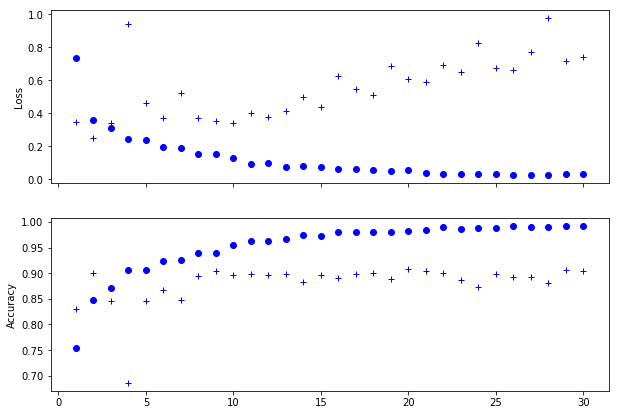

In [6]:
plot_history(history)

## Combine new classifier with conv_base from VGG16

In [13]:
combined = models.Sequential()
combined.add(conv_base)
combined.add(model)
combined.compile(optimizer=optimizers.RMSprop(),
                loss=losses.binary_crossentropy,
                metrics=['acc'])

In [14]:
combined.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 2097665   
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
valid_generator = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    valid_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [15]:
combined.evaluate_generator(valid_generator, steps=1)

[0.81684434413909912, 0.94999998807907104]